# Meshing library examples

Imports

In [97]:
from mesh_lib import *
import numpy as np
import pandas as pd; pd.options.mode.chained_assignment = None; pd.set_option('display.max_columns', 500)

Set domain

In [98]:
domain = [(0,0), (1,0), (1,1), (0,1)]

Generate basic mesh and compare

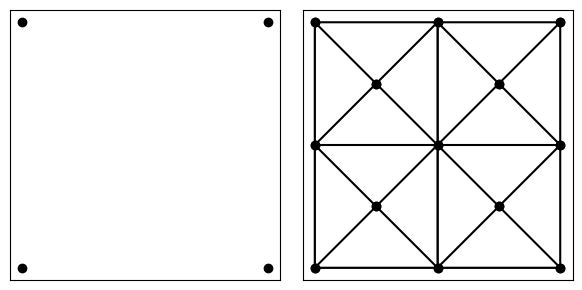

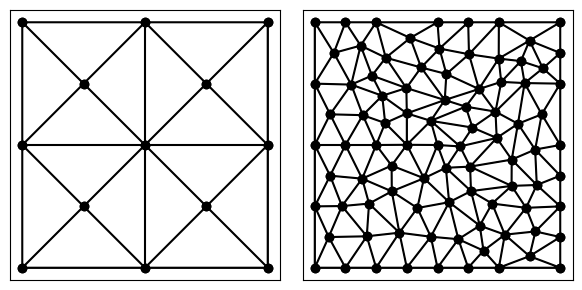

In [99]:
mesh_coarse = Mesh(domain)
mesh_coarse.generate_mesh(h=0.1)

mesh_fine = Mesh(domain)
mesh_fine.generate_mesh(h=0.01)

mesh_coarse.compare()
mesh_coarse.compare(mesh_fine)


Evaluate (roughly) the mesh

In [100]:
# print(f'Max. edge length: {mesh_coarse.max_H()}')
# print(f'Min. edge length: {mesh_coarse.min_H()}')

# print(f'Max. edge length: {mesh_fine.max_H()}')
# print(f'Min. edge length: {mesh_fine.min_H()}')

Generate basic mesh (specify max. edge length)

In [101]:
# mesh = Mesh(domain)
# a = mesh.specify_edge_length(h = 0.1)
# mesh.generate_mesh(h=a)
# mesh.compare()

Create a sub-mesh on a single element

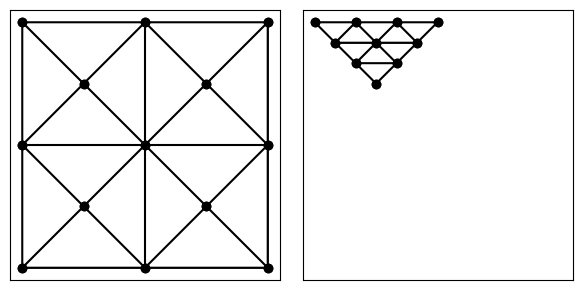

In [102]:
mesh = Mesh(domain, H = 0.1)
sub_mesh = mesh.generate_sub_mesh(element=2, N=4)
mesh.compare(sub_mesh)

Create a sub-mesh over all elements

Refinement ratio: 0.11785113019775766


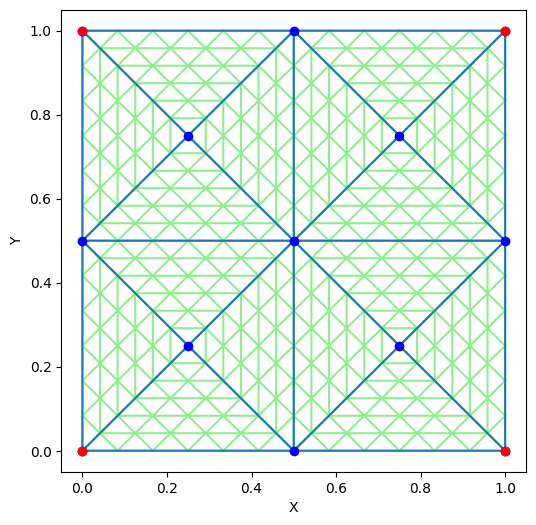

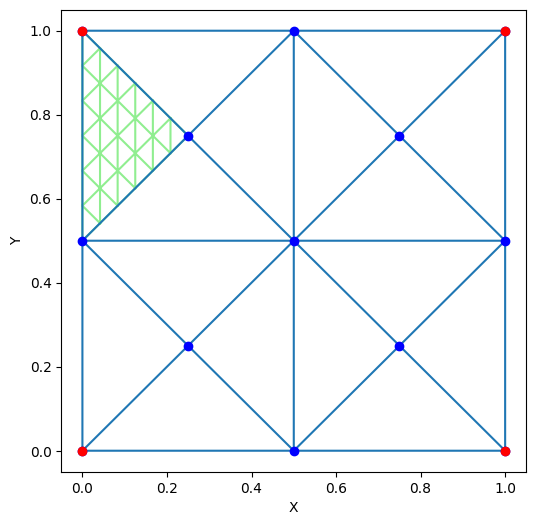

Max. edge length: H_max = 0.5
Min. edge length: H_min = 0.3535533905932738
Min. edge length (sub_mesh): h_min = 0.05892556509887883


In [103]:
mesh = Mesh(domain)
mesh.generate_full_mesh(0.1, 7)
print(f"Refinement ratio: {mesh.get_refinement_ratio()}")

# Plot all sub-elements
mesh.plot_sub_mesh()

# Plot specified elements
mesh.plot_sub_mesh([3])

print(f'Max. edge length: H_max = {mesh.max_H()}')
print(f'Min. edge length: H_min = {mesh.min_H()}')
print(f'Min. edge length (sub_mesh): h_min = {mesh.min_h()}')

Show translation of nodes/points from the reference triangle to arb. triangles

In [104]:
# nodes, weights = mesh.GLQ()
# points = mesh._get_element_points(6)
# translated_points, J = mesh.translate(nodes, points)

# print(f"Determinant: {J}")

# plt.triplot([0, 1, 0], [0, 0, 1])
# plt.scatter(nodes[:,0], nodes[:,1], c='r')
# plt.show()

# plt.triplot(points[:,0], points[:,1])
# plt.scatter(translated_points[:,0], translated_points[:,1], c='r')
# plt.show()

Integration example

In [105]:
# from time import time

# def f(x):
#     return np.square(x[:,0]+x[:,1])

# mesh = Mesh(domain)
# mesh.generate_mesh(0.01)

In [106]:
# %%timeit
# I, i = mesh.integrate(f)

In [107]:
# print(f"Result: {i}")
# print(f"Error = {7/6 - i}")
# mesh.convergence(f, 7/6)

Check we can match vertices of finer mesh along the edges of the coarser mesh?


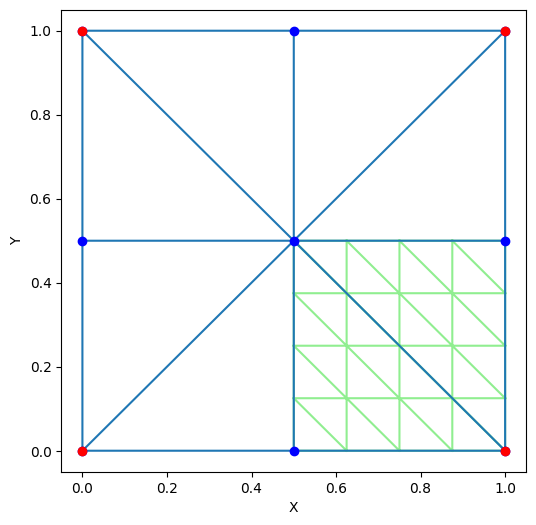

In [108]:
mesh = Mesh(domain, H = 0.2, N = 5)
mesh.plot_sub_mesh([6, 5])

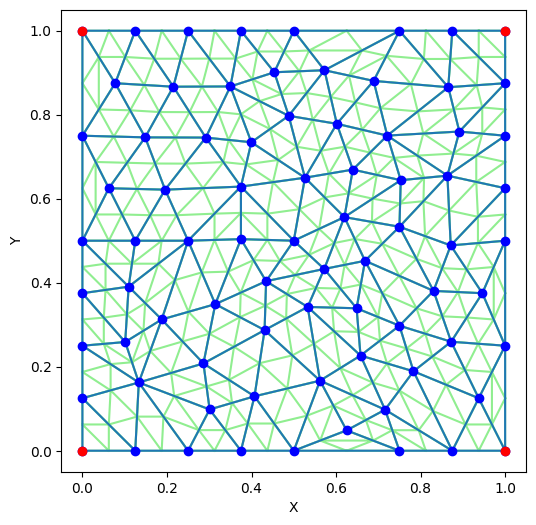

In [109]:
mesh = Mesh(domain, H = 0.012, N = 3)
mesh.plot_sub_mesh()

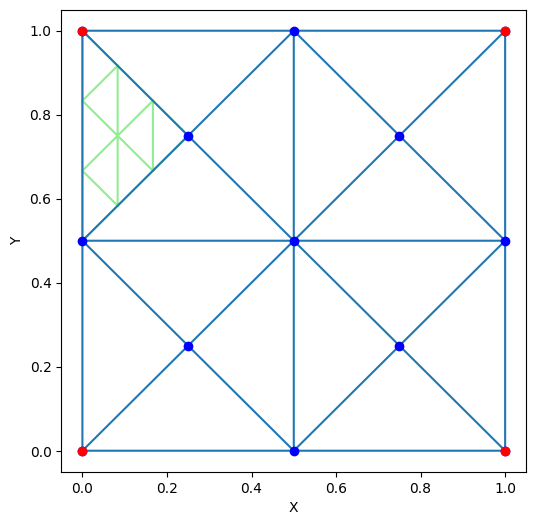

Triangles of sub mesh:
[[0, 1, 4], [1, 5, 4], [1, 2, 5], [2, 6, 5], [2, 3, 6], [4, 5, 7], [5, 8, 7], [5, 6, 8], [7, 8, 9]]
Vertices of sub mesh:
[[0.         1.        ]
 [0.         0.83333333]
 [0.         0.66666667]
 [0.         0.5       ]
 [0.08333333 0.91666667]
 [0.08333333 0.75      ]
 [0.08333333 0.58333333]
 [0.16666667 0.83333333]
 [0.16666667 0.66666667]
 [0.25       0.75      ]]
Vertex markers:
[1 1 1 1 1 0 1 1 1 1]
Vertex boundary:
[1 1 1 1 0 0 0 0 0 0]
Edges of sub mesh:
[[0, 1], [0, 4], [1, 4], [1, 5], [4, 5], [1, 2], [2, 5], [2, 6], [5, 6], [2, 3], [3, 6], [4, 7], [5, 7], [5, 8], [7, 8], [6, 8], [7, 9], [8, 9]]
Edge markers:
[1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1]
Edge boundary:
[1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
Edge ids:
[[ 0  2  1]
 [ 3  4  2]
 [ 5  6  3]
 [ 7  8  6]
 [ 9 10  7]
 [ 4 12 11]
 [13 14 12]
 [ 8 15 13]
 [14 17 16]]
Flipped:
[[0 0 1]
 [0 1 1]
 [0 0 1]
 [0 1 1]
 [0 0 1]
 [0 0 1]
 [0 1 1]
 [0 0 1]
 [0 0 1]]


In [110]:
i = 3

mesh = Mesh(domain, H = 0.1, N = 4)
mesh.plot_sub_mesh([i])

element = mesh.meshed_elements[i].mesh

print("Triangles of sub mesh:")
print(element['triangles'])

print("Vertices of sub mesh:")
print(element['vertices'])

print("Vertex markers:")
print(element['vertex_markers'])

print("Vertex boundary:")
print(element['vertex_boundary'])

print("Edges of sub mesh:")
print(element['edges'])

print("Edge markers:")
print(element['edge_markers'])

print("Edge boundary:")
print(element['edge_boundary'])

print("Edge ids:")
print(element['edges_index_inside_triangle'])

print("Flipped:")
print(element['flipped'])

#edges_index_inside_triangle

In [111]:
mesh.generate_dfs()
print(mesh.triangles_df.to_string())

updating dicts
    local_id         nodes            edges big_triangle_id
0          0     [0, 1, 4]        [0, 1, 2]               0
1          1     [1, 5, 4]        [2, 3, 4]               0
2          2     [1, 2, 5]        [5, 3, 6]               0
3          3     [2, 6, 5]        [6, 7, 8]               0
4          4     [2, 3, 6]       [9, 7, 10]               0
5          5     [4, 5, 7]      [4, 11, 12]               0
6          6     [5, 8, 7]     [12, 13, 14]               0
7          7     [5, 6, 8]      [8, 13, 15]               0
8          8     [7, 8, 9]     [14, 16, 17]               0
9          0  [10, 11, 13]     [18, 19, 20]               1
10         1  [11, 14, 13]     [20, 21, 22]               1
11         2  [11, 12, 14]     [23, 21, 24]               1
12         3  [12, 15, 14]     [24, 25, 26]               1
13         4   [12, 0, 15]     [27, 28, 25]               1
14         5  [13, 14, 16]     [22, 29, 30]               1
15         6  [14, 17, 16

In [112]:

print(mesh.nodes_df.to_string())

   local_id         x         y               big_triangle_id  boundary  internal                     lil_triangle_id
0         0  0.500000  0.500000  [0, 1, 4, 5, 10, 11, 12, 13]     False     False  [0, 13, 40, 45, 90, 103, 108, 121]
1         1  0.583333  0.416667                        [0, 4]     False     False               [0, 1, 2, 38, 39, 40]
2         2  0.666667  0.333333                        [0, 4]     False     False               [2, 3, 4, 36, 37, 38]
3         3  0.750000  0.250000                [0, 4, 14, 15]     False     False                   [4, 36, 134, 143]
4         4  0.666667  0.500000                       [0, 12]     False     False            [0, 1, 5, 108, 109, 110]
5         5  0.750000  0.416667                           [0]     False      True                  [1, 2, 3, 5, 6, 7]
6         6  0.833333  0.333333                       [0, 14]     False     False            [3, 4, 7, 132, 133, 134]
7         7  0.833333  0.500000                       [0

In [113]:
print(mesh.edges_df.to_string())

    local_id     nodes big_triangle_id             midpoints  edge_length  boundary  internal
0          0    [0, 1]          [0, 4]  [0.541666, 0.458334]     0.117851     False     False
1          1    [0, 4]         [0, 12]       [0.583334, 0.5]     0.166667     False     False
2          2    [1, 4]             [0]     [0.625, 0.458334]     0.117851     False      True
3          3    [1, 5]             [0]  [0.666666, 0.416667]     0.166667     False      True
4          4    [4, 5]             [0]  [0.708334, 0.458334]     0.117851     False      True
5          5    [1, 2]          [0, 4]        [0.625, 0.375]     0.117852     False     False
6          6    [2, 5]             [0]     [0.708334, 0.375]     0.117851     False      True
7          7    [2, 6]             [0]      [0.75, 0.333333]     0.166666     False      True
8          8    [5, 6]             [0]     [0.791666, 0.375]     0.117851     False      True
9          9    [2, 3]          [0, 4]  [0.708334, 0.291666]

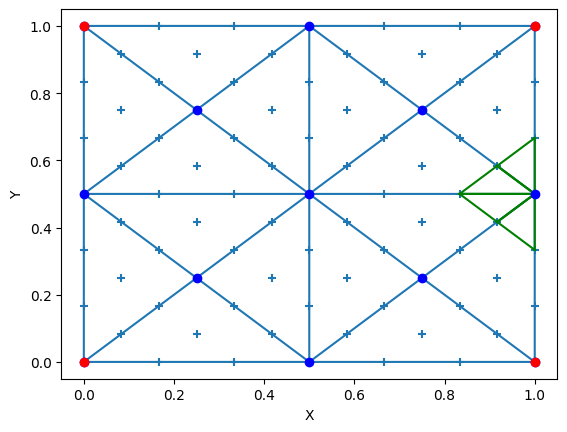

In [114]:
mesh.plot_point(9)

    

In [115]:
# i = 5
# mesh.plot_sub_mesh([i])

# print("Triangles of sub mesh:")
# print(mesh.meshed_elements[i].mesh['triangles'])

# print("Vertices of sub mesh:")
# print(mesh.meshed_elements[i].mesh['vertices'])

# print("Vertex boundary:")
# print(mesh.meshed_elements[i].mesh['vertex_boundary'])

# print("Vertex markers:")
# print(mesh.meshed_elements[i].mesh['vertex_markers'])

# print("Edges of sub mesh:")
# print(mesh.meshed_elements[i].mesh['edges'])

# print("Edge boundary:")
# print(mesh.meshed_elements[i].mesh['edge_boundary'])

# print("Edge markers:")
# print(mesh.meshed_elements[i].mesh['edge_markers'])

# print("Edge ids:")
# print(mesh.meshed_elements[i].mesh['edges_index_inside_triangle'])

# print("Flipped:")
# print(mesh.meshed_elements[i].mesh['flipped'])

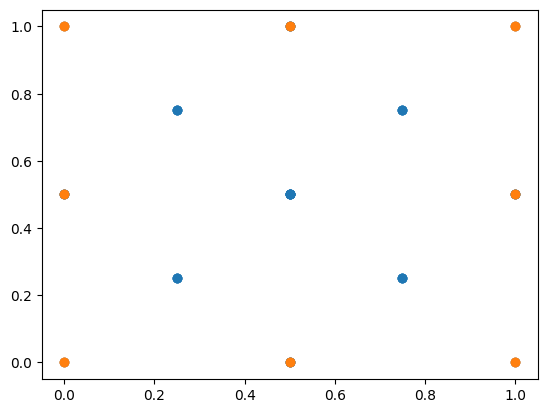

In [116]:
big_mesh = mesh.mesh

edge_markers = np.array(big_mesh['edge_markers']).flatten().astype(bool)
boundary_edges = big_mesh['edges'][edge_markers]
internal_edges = big_mesh['edges'][~edge_markers]

nodes_on_boundary_edges = big_mesh['vertices'][boundary_edges]
nodes_on_internal_edges = big_mesh['vertices'][internal_edges]
# d = [[(node[0][0], node[0][1]), (node[1][0], node[1][1])] for node in nodes_on_boundary_edges]
b = np.reshape(nodes_on_boundary_edges, (-1,2))
c = np.reshape(nodes_on_internal_edges, (-1,2))

plt.scatter(c[:,0], c[:,1])
plt.scatter(b[:,0], b[:,1])
plt.show()